In [2]:
#importing the necessary dependencies

from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, BatchNormalization,Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [3]:
#loading dataset from keras module
(X_train, y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


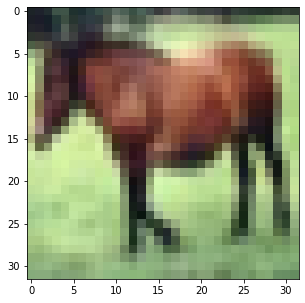

In [4]:
#plotting some images from the dataset
plt.figure(figsize=(8,5))
plt.imshow(X_train[7])
plt.show()

In [5]:
#convert the pixel values of the dataset to float type 
X_train=X_train.astype('float32')
y_train=y_train.astype('float32')

# normalize the dataset
X_train=X_train/255.0
X_train=X_train/255.0

In [6]:
#perform one-hot encoding for target classes
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes=y_train.shape[1]
num_classes

10

The 10 different classes of this dataset are:
1) Airplane
2) Car
3) Bird
4) Cat
5) Deer
6) Dog
7) Frog
8) Horse
9) Ship
10) Truck

In [7]:
#Create the Sequential model and add the layers
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(32,32,3),  kernel_initializer='he_uniform', padding='same', activation='relu'))  #filters=32, kernel_size=3,3
model.add(Dropout(0.2))       

model.add(Conv2D(32, (3,3), padding='same', activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [8]:
#compile the m odel
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [10]:
#fit the model on train data
model.fit(X_train,y_train,batch_size=32, epochs=10, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 41s 5ms/step - loss: 2.0477 - accuracy: 0.2509 - val_loss: 52883.5469 - val_accuracy: 0.2775
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6849 - accuracy: 0.4040 - val_loss: 52938.8828 - val_accuracy: 0.2799
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5631 - accuracy: 0.4430 - val_loss: 52674.6094 - val_accuracy: 0.2767
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4919 - accuracy: 0.4715 - val_loss: 58216.0273 - val_accuracy: 0.2530
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4408 - accuracy: 0.4891 - val_loss: 75012.3281 - val_accuracy: 0.2167
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3930 - accuracy: 0.5082 - val_loss: 50652.8867 - val_accuracy: 0.2746
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3496 - accuracy: 0.5232 - val_los

In [101]:
ModelLoss, ModelAccuracy = model.evaluate(x_train, y_train)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

1094/1094 [==============================] - 3s 3ms/step - loss: 0.8844 - accuracy: 0.6954
Model Loss is 0.8844010829925537
Model Accuracy is 0.6953999996185303


In [12]:
#the model performance is not quite good, we'll try transfer learning

In [13]:
model.save('cifar10_model.h5')

In [15]:
#Now, we'll use Transfer Learning techniques of ResNet and Vgg19
from keras.applications import VGG19,ResNet50
#Import the datagenerator to augment images'
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from sklearn.model_selection import  train_test_split
from keras.callbacks import ReduceLROnPlateau

In [16]:
x_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3)

In [17]:
#Print the dimensions of the datasets
#Since the labels are already one-hot encoded, we have 10 classes
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((X_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [18]:
#Data Augmentation Function:
# Let's define an instance of the ImageDataGenerator class and set the parameters.
#We have to instantiate for the Train,Validation and Test datasets

train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1) 

In [19]:
#Fit the augmentation method to the data

train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(X_test)

In [21]:
#For the 2nd base model we will use Resnet 50 and compare the performance against the previous one.The hypothesis is that Resnet 50 should perform better because of its deeper architecture'
base_model_resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

94773248/94765736 [==============================] - 1s 0us/step


The next step is to define the learning rate for the optimizer we will use. I have chosen Adam optimizer. 
 Adam stands for Adaptive Moment estimation and maintains a separate learning rate for each parameter and updates them separately.

In [92]:
#defining the optimizers
learn_rate=.001
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [93]:
#Learning Rate Annealer: The learning rate can be modified after a set number of epochs or after a certain condition is met. 
#We will use the latter and change the learning rate if the validation error does not reduce after a set number of epochs. To do this we will use the patience parameter.'''

lrr= ReduceLROnPlateau(
                       monitor='val_accuracy', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_accuracy, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

In [95]:
# Model Training. Since we're using a function to generate data, we have to use the argument fit_generator. 
#Both the train data and the validation data will be generated using the augmentation methods we have previously defined. To use the fit_generator function we will define the following parameters:
#generator.flow(x_train,y_train,batch_size)

batch_size= 100
epochs=50
STEPS = len(x_train) / 256


In [102]:
#Since we have already defined Resnet50 as base_model_resnet, let us build the sequential model.
model_2=Sequential()
#Add the Dense layers along with activation and batch normalization
model_2.add(base_model_resnet)
model_2.add(Flatten())


In [55]:
#Add the Dense layers along with activation and batch normalization
model_2.add(Dense(4000,activation=('relu'),input_dim=512))
model_2.add(Dense(2000,activation=('relu'))) 
model_2.add(Dropout(.4))#Adding a dropout layer that will randomly drop 40% of the weights
model_2.add(Dense(1000,activation=('relu'))) 
model_2.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_2.add(Dense(500,activation=('relu')))
model_2.add(Dropout(.2))#Adding a dropout layer that will randomly drop 20% of the weights
model_2.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [56]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 4000)              8196000   
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)             

In [57]:
model_2.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
model_2.fit_generator(train_generator.flow(x_train,y_train,batch_size=256),
                     epochs=100,steps_per_epoch=STEPS,
                     validation_data=val_generator.flow(x_val,y_val,batch_size=256),
                      callbacks=[lrr],verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
136/136 [==============================] - 33s 218ms/step - loss: 0.8704 - accuracy: 0.7118 - val_loss: 2.5830 - val_accuracy: 0.1043
Epoch 2/100
136/136 [==============================] - 26s 193ms/step - loss: 0.7421 - accuracy: 0.7535 - val_loss: 2.5025 - val_accuracy: 0.1031
Epoch 3/100
136/136 [==============================] - 26s 193ms/step - loss: 0.6744 - accuracy: 0.7788 - val_loss: 2.8221 - val_accuracy: 0.1060
Epoch 4/100
136/136 [==============================] - 27s 198ms/step - loss: 0.6211 - accuracy: 0.7981 - val_loss: 3.0468 - val_accuracy: 0.1061
Epoch 5/100
136/136 [==============================] - 27s 195ms/step - loss: 0.5710 - accuracy: 0.8153 - val_loss: 2.3640 - val_accuracy: 0.1532
Epoch 6/100
136/136 [==============================] - 27s 196ms/step - loss: 0.5436 - accuracy: 0.8269 - val_loss: 3.9408 - val_accuracy: 0.1487
Epoch 7/100
136/136 [==============================] - 27s 197ms/step - loss: 0.5030 - accuracy: 0.8373 - val_loss: 4.7606 -

In [60]:
model_2.save('resnetmodel.h5')

In [81]:
ModelLoss, ModelAccuracy = model_2.evaluate(x_train, y_train)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

1094/1094 [==============================] - 15s 13ms/step - loss: 0.0631 - accuracy: 0.9788
Model Loss is 0.0630747601389885
Model Accuracy is 0.9788285493850708


In [84]:
ModelLoss, ModelAccuracy = model.evaluate(x_val, y_val)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

469/469 [==============================] - 2s 3ms/step - loss: 1.0789 - accuracy: 0.6247
Model Loss is 1.0789200067520142
Model Accuracy is 0.624666690826416
